In [1]:
# install DESeq2
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("DESeq2")

## DESeq2


In [2]:
library('ggplot2')
library('RColorBrewer')
library('DESeq2')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, 

In [3]:
countFile <- '~/projects/counts_for_deseq2.csv'
counts <- read.csv(countFile, 
                   header=TRUE, row.names=1)
# Remove the column for transcript length
counts$Length <- NULL

head(counts)

,lin28b_ctrl_rep1,lin28b_ctrl_rep2,lin28b_kd_rep1,lin28b_kd_rep2
ENSG00000223972.4,0,2,0,0
ENSG00000227232.4,294,294,334,410
ENSG00000243485.2,0,0,0,0
ENSG00000237613.2,0,2,4,7
ENSG00000268020.2,0,0,0,0
ENSG00000240361.1,0,0,0,0


In [4]:
colFile <- '~/projects/conditions_matrix_deseq2.csv'
col_data <- read.csv(colFile,
                  header=TRUE, row.names=1)

head(col_data)

,condition
lin28b_ctrl_rep1,control
lin28b_ctrl_rep2,control
lin28b_kd_rep1,knockdown
lin28b_kd_rep2,knockdown


In [5]:
# design: how the counts for each gene depend on the variables in colData
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = col_data,
                              design = ~ condition)

In [6]:
dds

class: DESeqDataSet 
dim: 57820 4 
metadata(1): version
assays(1): counts
rownames(57820): ENSG00000223972.4 ENSG00000227232.4 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(0):
colnames(4): lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
  lin28b_kd_rep2
colData names(1): condition

### filter gene expressions

In [9]:
head(counts(dds))

,lin28b_ctrl_rep1,lin28b_ctrl_rep2,lin28b_kd_rep1,lin28b_kd_rep2
ENSG00000223972.4,0,2,0,0
ENSG00000227232.4,294,294,334,410
ENSG00000243485.2,0,0,0,0
ENSG00000237613.2,0,2,4,7
ENSG00000268020.2,0,0,0,0
ENSG00000240361.1,0,0,0,0


In [10]:
rowSums(head(counts(dds))) > 4

ENSG00000223972.4 ENSG00000227232.4 ENSG00000243485.2 ENSG00000237613.2 
            FALSE              TRUE             FALSE              TRUE 
ENSG00000268020.2 ENSG00000240361.1 
            FALSE             FALSE

In [11]:
dds <- dds[ rowSums(counts(dds)) > 4, ]

In [12]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [13]:
dds

class: DESeqDataSet 
dim: 20367 4 
metadata(1): version
assays(4): counts mu H cooks
rownames(20367): ENSG00000227232.4 ENSG00000237613.2 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(4): lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
  lin28b_kd_rep2
colData names(2): condition sizeFactor

In [14]:
dds

class: DESeqDataSet 
dim: 20367 4 
metadata(1): version
assays(4): counts mu H cooks
rownames(20367): ENSG00000227232.4 ENSG00000237613.2 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(4): lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
  lin28b_kd_rep2
colData names(2): condition sizeFactor

In [15]:
#as.data.frame(res)

In [16]:
res <- results(dds)

outFname = "~/projects/differential_expression.csv"
write.csv(as.data.frame(res), file=outFname)

summary(res)


out of 20367 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 748, 3.7%
LFC < 0 (down)     : 1133, 5.6%
outliers [1]       : 0, 0%
low counts [2]     : 11846, 58%
(mean count < 211)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [17]:
res_df <- as.data.frame(res)

## Add Hugo gene names

In [18]:
head(res_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000227232.4,330.36270,0.1524128,0.2187426,0.6967678,4.859481e-01,0.6778136653
ENSG00000237613.2,2.97862,2.3246000,2.1882391,1.0623153,2.880926e-01,NA
ENSG00000238009.2,126.66769,0.3134621,0.3264792,0.9601288,3.369904e-01,NA
ENSG00000237683.5,1341.55539,0.7024011,0.1533410,4.5806480,4.635375e-06,0.0002170221
ENSG00000239906.1,21.70825,1.4450013,0.7511264,1.9237791,5.438228e-02,NA
ENSG00000241860.2,145.53255,-0.3763647,0.4268807,-0.8816624,3.779594e-01,NA


In [19]:
gene_dir = '/home/ucsd-train97/scratch/annotations/hg19/'
gene_names <- read.csv(paste0(gene_dir,"gencode.v19.annotation.genenames.txt"),
                         header=FALSE, row.names=1)

In [20]:
gene_names$gene_ensbl = rownames(gene_names)

res_df$gene_ensbl = rownames(res_df)

In [21]:
head(gene_names)

,V2,gene_ensbl
ENSG00000223972.4,DDX11L1,ENSG00000223972.4
ENSG00000227232.4,WASH7P,ENSG00000227232.4
ENSG00000243485.2,MIR1302-11,ENSG00000243485.2
ENSG00000237613.2,FAM138A,ENSG00000237613.2
ENSG00000268020.2,OR4G4P,ENSG00000268020.2
ENSG00000240361.1,OR4G11P,ENSG00000240361.1


In [22]:
head(res_df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_ensbl
ENSG00000227232.4,330.36270,0.1524128,0.2187426,0.6967678,4.859481e-01,0.6778136653,ENSG00000227232.4
ENSG00000237613.2,2.97862,2.3246000,2.1882391,1.0623153,2.880926e-01,NA,ENSG00000237613.2
ENSG00000238009.2,126.66769,0.3134621,0.3264792,0.9601288,3.369904e-01,NA,ENSG00000238009.2
ENSG00000237683.5,1341.55539,0.7024011,0.1533410,4.5806480,4.635375e-06,0.0002170221,ENSG00000237683.5
ENSG00000239906.1,21.70825,1.4450013,0.7511264,1.9237791,5.438228e-02,NA,ENSG00000239906.1
ENSG00000241860.2,145.53255,-0.3763647,0.4268807,-0.8816624,3.779594e-01,NA,ENSG00000241860.2


In [23]:
res_df_genes = merge(res_df,gene_names,by = 'gene_ensbl')

In [24]:
dim(res_df_genes)

[1] 20367     8

In [25]:
head(res_df_genes)

gene_ensbl,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2
ENSG00000000003.10,1.112926,1.76310863,3.2318346,0.54554419,0.58537929,NA,TSPAN6
ENSG00000000005.5,1.076500,0.31110867,3.8255846,0.08132317,0.93518495,NA,TNMD
ENSG00000000419.8,1369.582209,-0.31050624,0.1476757,-2.10262186,0.03549884,0.13650072,DPM1
ENSG00000000457.9,206.785145,0.02007926,0.2559870,0.07843859,0.93747918,NA,SCYL3
ENSG00000000460.12,690.251253,-0.33519465,0.1452314,-2.30800318,0.02099896,0.09724573,C1orf112
ENSG00000000938.8,2.256262,-0.46935673,2.0524404,-0.22868227,0.81911588,NA,FGR


## Filter genes by p < 0.05

In [26]:
sig_gens <- res_df_genes[which(res_df_genes$padj < 0.05),]

In [27]:
head(sig_gens)

,gene_ensbl,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2
8,ENSG00000001036.9,1716.327,-0.3679974,0.12884524,-2.856119,0.0042885415,0.0347363707,FUCA2
20,ENSG00000002549.8,1527.853,-0.3596535,0.13112064,-2.742921,0.0060895415,0.0438251549,LAP3
24,ENSG00000002834.13,4535.036,0.2367614,0.07960797,2.974092,0.0029385683,0.0272484538,LASP1
26,ENSG00000003056.3,1535.282,-0.3725155,0.13876250,-2.684555,0.0072626513,0.0491590920,M6PR
42,ENSG00000004478.5,3517.104,-0.4472961,0.10488666,-4.264566,0.0000200291,0.0007023374,FKBP4
43,ENSG00000004487.11,5432.959,-0.3005657,0.08118524,-3.702221,0.0002137201,0.0044854895,KDM1A


In [28]:
write.csv(sig_gens,'~/projects/significant_genes_R.csv')

## Plot

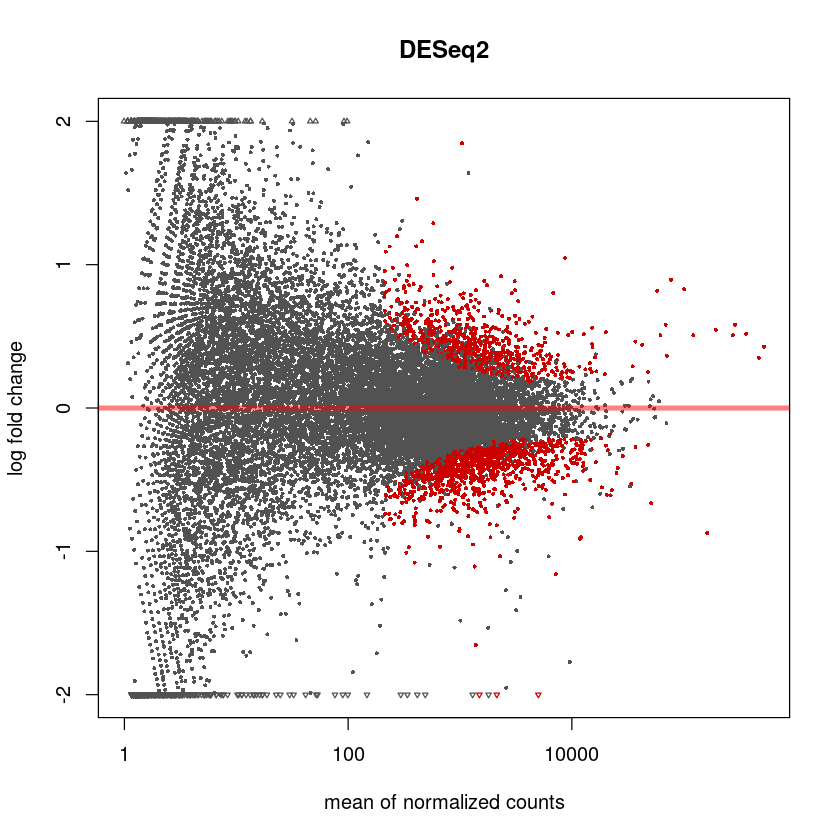

In [41]:
plotMA(res, main="DESeq2", ylim=c(-2,2))

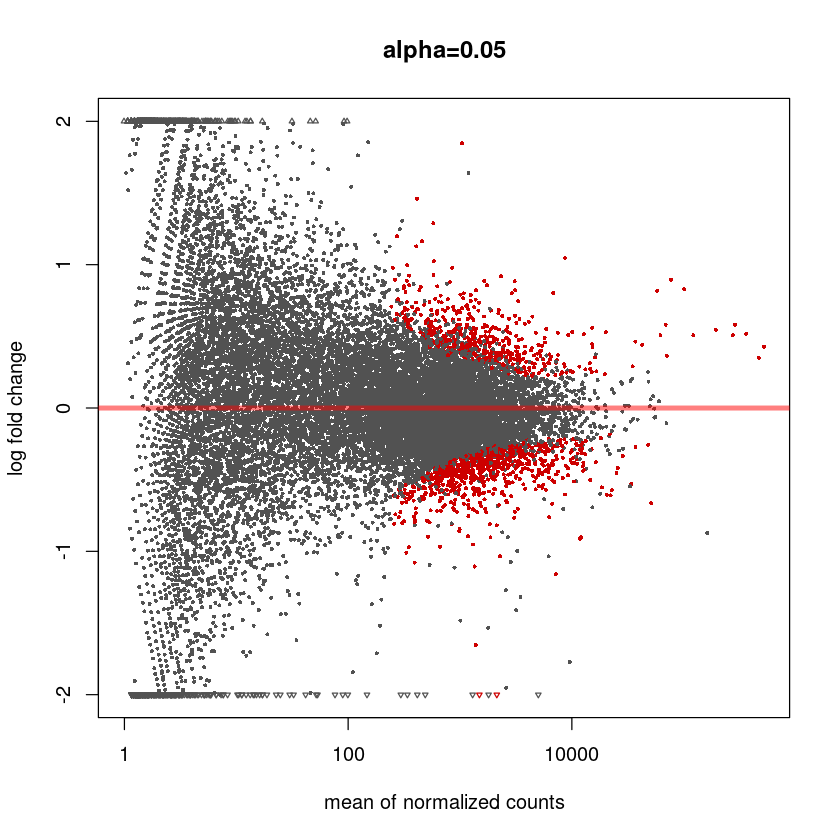

In [30]:
res05 <- results(dds, alpha=0.05)

plotMA(res05, main="alpha=0.05", ylim=c(-2,2))


In [34]:
rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)

data <- plotPCA(rld, intgroup="condition", returnData=TRUE)
percentVar <- round(100 * attr(data, "percentVar"))

In [35]:
data

,PC1,PC2,group,condition,name
lin28b_ctrl_rep1,-9.643613,0.6642826,control,control,lin28b_ctrl_rep1
lin28b_ctrl_rep2,1.805542,-3.8890526,control,control,lin28b_ctrl_rep2
lin28b_kd_rep1,4.454661,2.3497906,knockdown,knockdown,lin28b_kd_rep1
lin28b_kd_rep2,3.383410,0.8749794,knockdown,knockdown,lin28b_kd_rep2


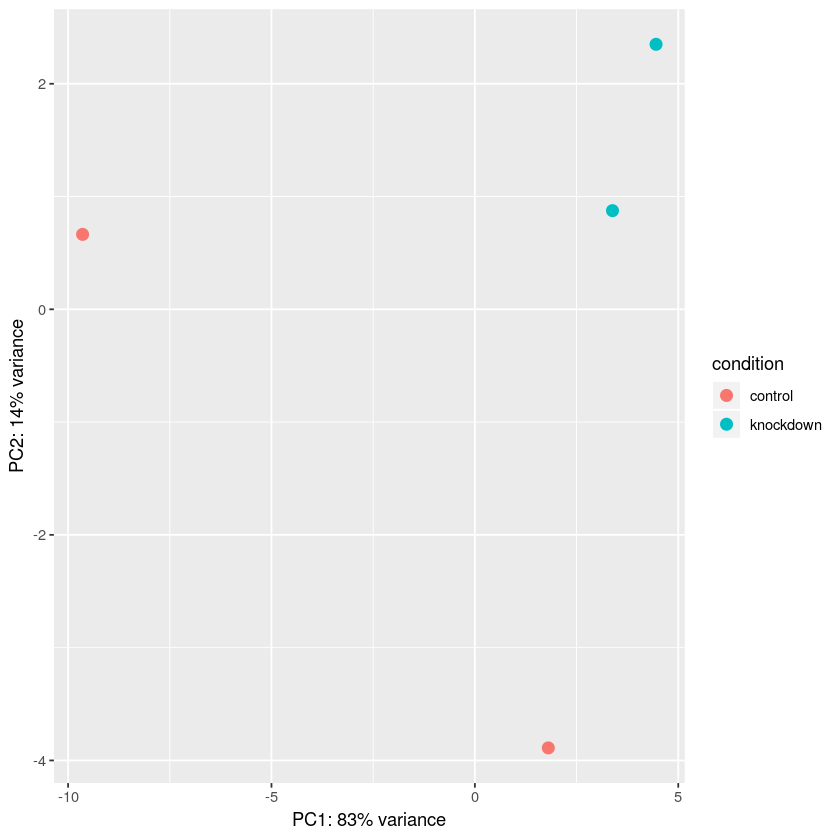

In [36]:
ggplot(data, aes(PC1, PC2, color=condition)) +
    geom_point(size=3) +
    xlab(paste0("PC1: ",percentVar[1],"% variance")) + 
    ylab(paste0("PC2: ",percentVar[2],"% variance"))

In [37]:
percentVar

[1] 83 14

In [38]:
dist(t(assay(rld)))

                 lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
lin28b_ctrl_rep2         15.76462                                
lin28b_kd_rep1           22.03689         14.52015               
lin28b_kd_rep2           18.95468         11.80575        8.31631

Warning message in plot.window(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.window(...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_cols" is not a graphical parameter”

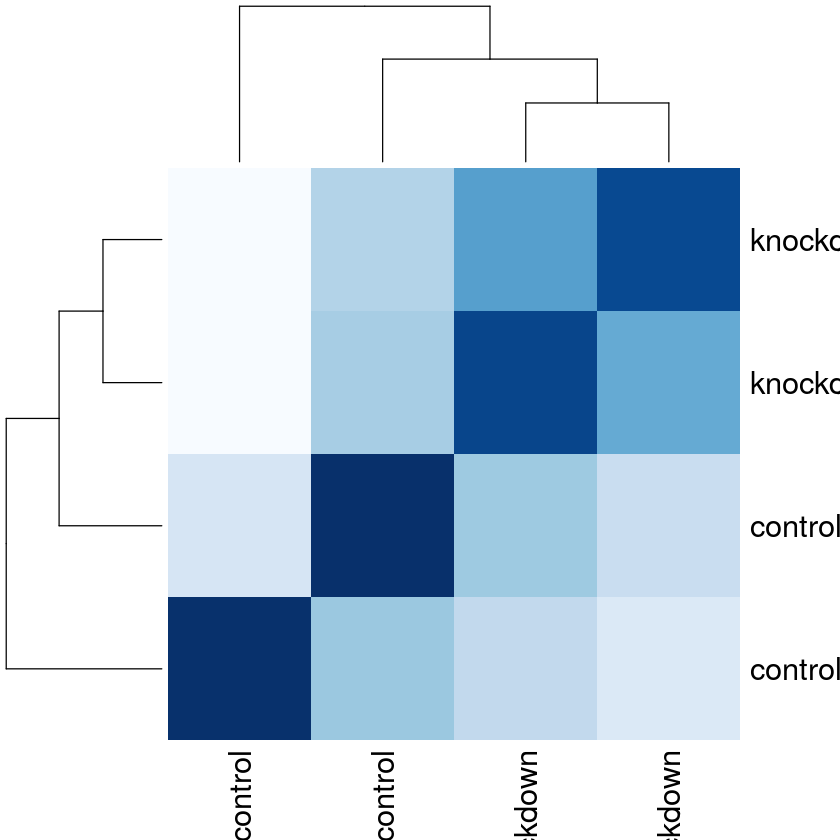

In [39]:
sampleDists <- dist(t(assay(rld)))

sampleDistMatrix <- as.matrix(sampleDists)

rownames(sampleDistMatrix) <- paste(rld$condition)

colnames(sampleDistMatrix) <- paste(rld$condition)

colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)

heatmap(sampleDistMatrix,
clustering_distance_rows=sampleDists,
clustering_distance_cols=sampleDists,
col=colors)